# Business Understanding

## Overview



The Paris Olympics is a global sporting event that has garnered significant attention and engagement across various social media platforms. Analyzing public sentiment regarding the Olympics can provide valuable insights into how athletes, countries and the overall event are perceived. This analysis can benefit sports organizations, media outlets, sponsors offering feedback on public perception, performance and engagement levels thus helping to tailor content and marketing strategies. Sentiment analysis can also benefit city officials to improve planning and address concerns such as health and sanitation.
The goal of this project is to perform a comprehensive sentiment analysis of social media content related to this year's Paris Olympics to understand public sentiment, identify emerging trends and provide a comprehensive understanding of how different aspects of the Olympics resonate with audiences worldwide.

## Problem Statement



The Paris Olympics is a high-profile event that generates a substantial volume of unstructured social media data that reflects public sentiment. The challenge lies in effectively analyzing this vast and diverse stream of data while also tackling challenges such as language differences, sentiment variations and contextual meanings in order to provide accurate and actionable insights.

## Proposed Solutions



1.	Use API access to collect data from major social media platforms and ensure compliance with platform policies and data protection regulations.
2.	Implement text normalization, tokenization and content filtering while utilizing language detection and translation tools for multilingual data handling.
3.	Employ advanced natural language processing models like BERT or GPT for sentiment classification incorporating sarcasm detection and contextual analysis for improved accuracy.
4.	Create an interactive dashboard using Tableau to display sentiment trends and insights with features for data filtering and exploring different aspects of the data.

## Objectives




### Main Objective
Develop a comprehensive social media sentiment analysis model that accurately captures and interprets public sentiment about the Paris Olympics from social media data.

### Specific Objectives
1.	To extract, preprocess and clean social media data from multiple platforms addressing quality issues and handling multilingual content related to the Paris Olympics.
2.	To develop and train advanced natural language processing models to accurately classify sentiments incorporating techniques to handle sarcasm and contextual nuances.
3.	To create interactive visualizations to display sentiment trends and key events providing actionable insights to stakeholders based on comprehensive analysis of public opinions.

## Success Metrics



- Accuracy – The proportion of correctly classified sentiments (positive, negative, neutral) out of all sentiments predicted by the model.
85% - 90%

- Precision -  The proportion of true positive sentiment predictions (correctly identified positive tweets) out of all predicted positives.
80% - 90% for both positive and negative sentiment classes.
75% - 85% for the neutral class.

- Recall - The proportion of true positive sentiment predictions out of all actual positives.
75% - 80% for all sentiment classes.

- F1 Score - The harmonic mean of Precision and Recall that provides a single metric that balances both precision and recall.
0.75 to 0.85

- Area Under the Curve - Receiver Operating Characteristic (AUC-ROC) - Measures how well a model distinguishes between classes. > 0.85

## Challenges


- Social media data is noisy and unstructured presenting challenges for accurate analysis.
- Distinguishing between positive, negative and neutral sentiments can be difficult especially when dealing with multilingual content thus affecting sentiment analysis accuracy
- The volume of social media posts and comments can be overwhelming particularly during major events like the Olympics. Managing and processing large volumes of real-time data necessitates efficient data handling and processing techniques.
- Interpreting context and sarcasm an extra layer of complexity as the sentiment expressed may not always align with the literal meaning of the words used. Social media content often includes informal language, slang and nuanced expressions that can skew sentiment analysis

## Conclusion



This sentiment analysis project aims to deliver a comprehensive understanding of public opinion about the Paris Olympics by leveraging social media data. By addressing the challenges of data quality, sentiment accuracy, multilingual content and implementing advanced NLP techniques, the project will provide actionable insights to the aforementioned stakeholders. Successful execution will enable better engagement strategies and enhance the overall experience of the Olympics for audiences worldwide.

## Data Understanding




### Data Sources
1.	APIs - Extract data from social media sites such as Twitter, Facebook and Instagram in the form of posts, tweets, comments and hashtags using their respective APIs.
The focus will be on posts mentioning Paris Olympics, relevant hashtags and location-based data.

2.	Web Scraping - Extract additional data from comments and discussions from news sites and sports forums such as ESPN and Sports Center

### Datasets



1.	Social media data in the form of tweets, facebook and Instagram posts and comments mentioning the Paris Olympics.
2.	News articles, comments and replies discussing the various aspects of the Olympics.

### Relevance of The Data



>The data sources and datasets identified for this project are highly relevant to analyzing public sentiment surrounding the Paris Olympics. Social media platforms like Twitter, Facebook and Instagram capture immediate reactions, discussions and emotional responses from a global audience thus providing a rich source of unfiltered public sentiment.
The inclusion of location-based data and relevant hashtags allows for more targeted analysis potentially revealing geographical trends and topic-specific sentiments. Complementing this with web scraping of news sites and sports forums like ESPN and Sports Center adds depth to the analysis by incorporating more structured discussions and content.
This combination of data sources offers a comprehensive view of public sentiment ranging from spontaneous reactions on social media to more considered opinions in news comment sections and sports forums.

#### Python Modules Importation

In [1]:
# import necessary modules
# manupulation
import pandas as pd
import os
import numpy as np

# Download required NLTK data
# nltk.download('stopwords')
# nltk.download('wordnet')
# nltk.download('averaged_perceptron_tagger')

# nltk
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.probability import FreqDist
from nltk.stem import WordNetLemmatizer


#### Combining CSV Files

In [3]:
# Folder in which the csv files are found
folder_path = 'X_data'

# List of all the csv files found in the folder
csv_files = [fil for fil in os.listdir(folder_path) if fil.endswith('.csv')]

# Create an empty list to store DataFrames
data_frames = []

# Loop through the list of CSV files and read each one into a DataFrame
for file in csv_files:
    file_path = os.path.join(folder_path, file)
    df = pd.read_csv(file_path)
    data_frames.append(df)

# Concatenate all DataFrames into one (stack vertically)
merged_df = pd.concat(data_frames, ignore_index=True, sort=False)

merged_df.info()

# Save the concatenated DataFrame to a new CSV file
new_df = '2024-olympics-sentiments.csv'
merged_df.to_csv(new_df, index=False)
# print(f'merged CSV file saved as {output_file}')



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53171 entries, 0 to 53170
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Category                  53171 non-null  object
 1   Keyword                   53171 non-null  object
 2   Web_Page_URL              53171 non-null  object
 3   Tweet_Website             53171 non-null  object
 4   Author_Name               53132 non-null  object
 5   Author_Web_Page_URL       53171 non-null  object
 6   Tweet_Timestamp           49848 non-null  object
 7   Tweet_Content             53153 non-null  object
 8   Tweet_Image_URL           25043 non-null  object
 9   Tweet_Video_URL           53171 non-null  object
 10  Tweet_AD                  53171 non-null  bool  
 11  Tweet_Number_of_Reviews   39908 non-null  object
 12  Tweet_Number_of_Retweets  45432 non-null  object
 13  Tweet_Number_of_Likes     50328 non-null  object
 14  Tweet_Number_of_Looks 

In [4]:
class DataUnderstanding():
    """Class that provides an understanding of a dataset"""

    def __init__(self, data=None):
        """Initialization"""
        self.df = data

    def load_data(self, path):
        """Load the data"""
        if self.df is None:
            self.df = pd.read_csv(path, encoding='latin-1')
        return self.df

    def understanding(self):
        """Provides insights into the dataset"""
        # Info
        print("INFO")
        print("-" * 4)
        self.df.info()

        # Shape
        print("\n\nSHAPE")
        print("-" * 5)
        print(f"Records in dataset: {self.df.shape[0]} with {self.df.shape[1]} columns.")

        # Columns
        print("\n\nCOLUMNS")
        print("-" * 6)
        print("Columns in the dataset are:")
        for idx in self.df.columns:
            print(f"- {idx}")

        # Unique Values
        print("\n\nUNIQUE VALUES")
        print("-" * 12)
        for col in self.df.columns:
            print(f"Column {col} has {self.df[col].nunique()} unique values")
            if self.df[col].nunique() < 12:
                print(f"Top unique values in {col} include:")
                for idx in self.df[col].value_counts().index:
                    print(f"- {idx}")
            print("")

        # Missing or Null Values
        print("\nMISSING VALUES")
        print("-" * 15)
        for col in self.df.columns:
            print(f"Column {col} has {self.df[col].isnull().sum()} missing values.")

        # Duplicate Values
        print("\n\nDUPLICATE VALUES")
        print("-" * 16)
        print(f"The dataset has {self.df.duplicated().sum()} duplicated records.")


In [5]:
# Create an instance of DataCleaning
data =  DataUnderstanding()

# Load the data (replace with your actual file path)
data_path = '2024-olympics-sentiments.csv'
df = data.load_data(data_path)
df

,Category,Keyword,Web_Page_URL,Tweet_Website,Author_Name,Author_Web_Page_URL,Tweet_Timestamp,Tweet_Content,Tweet_Image_URL,Tweet_Video_URL,Tweet_AD,Tweet_Number_of_Reviews,Tweet_Number_of_Retweets,Tweet_Number_of_Likes,Tweet_Number_of_Looks
0,TopPost,#paris2024,https://twitter.com/search?q=#paris2024&src=ty...,https://twitter.com/usabasketball/status/18216...,USA Basketball,https://twitter.com/usabasketball,2024-08-08,Olympic Legends. #USABMNT #Paris2024 #Basketball,https://pbs.twimg.com/media/GUfcvY8bYAA0fD6?fo...,https://twitter.com/usabasketball/status/18216...,False,241,7.6K,52K,3.2M
1,TopPost,#paris2024,https://twitter.com/search?q=#paris2024&src=ty...,https://twitter.com/canlesofficial/status/1821...,Canles,https://twitter.com/canlesofficial,NaN,We've created footwear that not only feels inc...,NaN,https://twitter.com/canlesofficial/status/1821...,True,NaN,NaN,2,32K
2,TopPost,#paris2024,https://twitter.com/search?q=#paris2024&src=ty...,https://twitter.com/Olympics/status/1821643768...,The Olympic GamesReload,https://twitter.com/Olympics,2024-08-08,#OLYMPICRECORD FOR RIZKI JUNIANSYAH! @iwfnet |...,NaN,https://twitter.com/Olympics/status/1821643768...,False,201,9.3K,14K,377K
3,TopPost,#paris2024,https://twitter.com/search?q=#paris2024&src=ty...,https://twitter.com/FIBA/status/18216605850475...,FIBA,https://twitter.com/FIBA,NaN,Everyone is watching the ball. Except for him....,https://pbs.twimg.com/media/GUfWSPCXcAAWmGV?fo...,https://twitter.com/FIBA/status/18216605850475...,False,93,2.8K,14K,388K
4,TopPost,#paris2024,https://twitter.com/search?q=#paris2024&src=ty...,https://twitter.com/WorldAthletics/status/1821...,World Athletics,https://twitter.com/WorldAthletics,2024-08-08,Men's javelin throw final was BIG 92.97m OR A...,https://pbs.twimg.com/media/GUfFbVIXgAAVYza?fo...,https://twitter.com/WorldAthletics/status/1821...,False,133,2K,11K,205K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53166,TopPost,#paris2024,https://twitter.com/search?q=#paris2024&src=ty...,https://twitter.com/Linus2k/status/88563519166...,Doctor Linus,https://twitter.com/Linus2k,2017-07-13,Il mio augurio Ã¨ che #Paris2024 sia un IMMENS...,NaN,https://twitter.com/Linus2k/status/88563519166...,False,3,9,23,NaN
53167,TopPost,#paris2024,https://twitter.com/search?q=#paris2024&src=ty...,https://twitter.com/ambafrancejp_jp/status/885...,ãã©ã³ã¹å¤§ä½¿é¤¨,https://twitter.com/ambafrancejp_jp,2017-07-14,ä»å¹´ããã©ã³ã¹å¤§ä½¿å ¬é¸ã«ã¦ããã...,https://pbs.twimg.com/media/DEsHE_OVoAEN27M?fo...,https://twitter.com/ambafrancejp_jp/status/885...,False,1,47,98,NaN
53168,TopPost,#paris2024,https://twitter.com/search?q=#paris2024&src=ty...,https://twitter.com/rubencronicas/status/88602...,RUBÃN HERNÃNDEZ,https://twitter.com/rubencronicas,2017-07-15,#Paris2024 @ClubFrance @FranciaenMexico @MX_Fr...,https://pbs.twimg.com/media/DEvMASzVYAAvZeb?fo...,https://twitter.com/rubencronicas/status/88602...,False,NaN,4,5,NaN
53169,TopPost,#paris2024,https://twitter.com/search?q=#paris2024&src=ty...,https://twitter.com/marcos_z/status/8848591646...,Marcos ZugastiReloadParis 2024,https://twitter.com/marcos_z,2017-07-11,Bancando los trapos. #Paris2024,NaN,https://twitter.com/marcos_z/status/8848591646...,False,NaN,4,8,NaN


In [6]:

# Get an understanding of the dataset
data.understanding()

INFO
----
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53171 entries, 0 to 53170
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Category                  53171 non-null  object
 1   Keyword                   53171 non-null  object
 2   Web_Page_URL              53171 non-null  object
 3   Tweet_Website             53171 non-null  object
 4   Author_Name               53132 non-null  object
 5   Author_Web_Page_URL       53171 non-null  object
 6   Tweet_Timestamp           49848 non-null  object
 7   Tweet_Content             53153 non-null  object
 8   Tweet_Image_URL           25043 non-null  object
 9   Tweet_Video_URL           53171 non-null  object
 10  Tweet_AD                  53171 non-null  bool  
 11  Tweet_Number_of_Reviews   39908 non-null  object
 12  Tweet_Number_of_Retweets  45432 non-null  object
 13  Tweet_Number_of_Likes     50328 non-null  object
 14  Tweet_Number

The dataset has 24725 duplicated records which looks unrealistic.Lets look if the rows are with duplicates values

In [8]:
# Identify duplicated rows
duplicates = df[df.duplicated(keep=False)]  # keep=False marks all duplicates as True

# Print the duplicated rows
duplicates.iloc[4000:4010]
# len(duplicates)

,Category,Keyword,Web_Page_URL,Tweet_Website,Author_Name,Author_Web_Page_URL,Tweet_Timestamp,Tweet_Content,Tweet_Image_URL,Tweet_Video_URL,Tweet_AD,Tweet_Number_of_Reviews,Tweet_Number_of_Retweets,Tweet_Number_of_Likes,Tweet_Number_of_Looks
4000,TopPost,#paris2024,https://twitter.com/search?q=#paris2024&src=ty...,https://twitter.com/karma_shopping/status/1821...,Karma Shopping,https://twitter.com/karma_shopping,NaN,"Why Is Everyone Saving Big on Flights, And You...",https://pbs.twimg.com/media/GUYQHooXAAA0DJU?fo...,https://twitter.com/karma_shopping/status/1821...,True,3,5,85,89K
4001,TopPost,#paris2024,https://twitter.com/search?q=#paris2024&src=ty...,https://twitter.com/Olympics/status/1821504388...,The Olympic GamesReload,https://twitter.com/Olympics,2024-08-08,#GOLD! Veddriq Leonardo clinches gold for Indo...,NaN,https://twitter.com/Olympics/status/1821504388...,False,432,9.4K,13K,621K
4002,TopPost,#parisolympics,https://twitter.com/search?q=#parisolympics&sr...,https://twitter.com/NBCOlympics/status/1821628...,NBC Olympics & ParalympicsReload,https://twitter.com/NBCOlympics,2024-08-08,Noah Lyles provides an update on his condition...,NaN,https://twitter.com/NBCOlympics/status/1821628...,False,479,1K,6.1K,1M
4003,TopPost,#parisolympics,https://twitter.com/search?q=#parisolympics&sr...,https://twitter.com/NBCOlympics/status/1821611...,NBC Olympics & ParalympicsReload,https://twitter.com/NBCOlympics,2024-08-08,That first Olympic final feeling for Nikki Hil...,NaN,https://twitter.com/NBCOlympics/status/1821611...,False,39,483,5.4K,323K
4004,TopPost,#parisolympics,https://twitter.com/search?q=#parisolympics&sr...,https://twitter.com/TeamUSA/status/18216320135...,Team USAReloadNBC Olympics & Paralympics,https://twitter.com/TeamUSA,2024-08-08,WORLD RECORD 50.37 @GoSydGo is unstoppable in ...,NaN,https://twitter.com/TeamUSA/status/18216320135...,False,69,1.3K,7.5K,493K
4005,TopPost,#paris2024,https://twitter.com/search?q=#paris2024&src=ty...,https://twitter.com/CMShehbaz/status/182163865...,Shehbaz Sharif,https://twitter.com/CMShehbaz,2024-08-08,Bravo Arshad History made!Pakistanâs first...,https://pbs.twimg.com/media/GUfCrjDXMAAg0ZQ?fo...,https://twitter.com/CMShehbaz/status/182163865...,False,2.4K,3.4K,14K,959K
4006,TopPost,#paris2024,https://twitter.com/search?q=#paris2024&src=ty...,https://twitter.com/SuperSportTV/status/182162...,SuperSport,https://twitter.com/SuperSportTV,2024-08-08,"Letsile Tebogo, he did it for his mom, for his...",https://pbs.twimg.com/media/GUey5NQX0AE2pQ6?fo...,https://twitter.com/SuperSportTV/status/182162...,False,50,784,3.7K,112K
4007,TopPost,#paris2024,https://twitter.com/search?q=#paris2024&src=ty...,https://twitter.com/FIBA/status/18216586312945...,FIBA,https://twitter.com/FIBA,2024-08-08,This is Avengers in real life.#Paris2024 x #Ba...,https://pbs.twimg.com/media/GUfU29fWAAAVqoo?fo...,https://twitter.com/FIBA/status/18216586312945...,False,64,1K,7.8K,216K
4008,TopPost,#paris2024,https://twitter.com/search?q=#paris2024&src=ty...,https://twitter.com/Grayscale/status/177737811...,Grayscale,https://twitter.com/Grayscale,NaN,Diversified crypto exposure in a single fund a...,NaN,https://twitter.com/Grayscale/status/177737811...,True,117,198,1.6K,29M
4009,TopPost,#parisolympics,https://twitter.com/search?q=#parisolympics&sr...,https://twitter.com/TeamUSA/status/18216394027...,Team USA,https://twitter.com/TeamUSA,2024-08-08,THESE ARE THE MOMENTS. OLYMPIC CHAMPION TARA D...,https://pbs.twimg.com/media/GUfDYRLXUAAh1eV?fo...,https://twitter.com/TeamUSA/status/18216394027...,False,84,1.3K,20K,510K


In [9]:
# Checking duplicates based on specific columns
duplicates = df[df.duplicated(subset=['Tweet_Website'], keep=False)]
len(duplicates)


52572

In [10]:
import pandas as pd

# Assuming `df` is your DataFrame
# Dictionary to store the count of duplicate values per column
duplicates_per_column = {}

# Iterate over each column in the DataFrame
for column in df.columns:
    # Count the number of duplicate values in the column (excluding NaN)
    duplicate_count = df[column].duplicated(keep=False).sum()
    duplicates_per_column[column] = duplicate_count

# Convert the dictionary to a DataFrame for better readability
duplicates_df = pd.DataFrame(list(duplicates_per_column.items()), columns=['Column', 'Number of Duplicates'])

print(duplicates_df)


                      Column  Number of Duplicates
0                   Category                 53171
1                    Keyword                 53171
2               Web_Page_URL                 53171
3              Tweet_Website                 52572
4                Author_Name                 52789
5        Author_Web_Page_URL                 52915
6            Tweet_Timestamp                 53113
7              Tweet_Content                 52510
8            Tweet_Image_URL                 52917
9            Tweet_Video_URL                 52572
10                  Tweet_AD                 53171
11   Tweet_Number_of_Reviews                 53015
12  Tweet_Number_of_Retweets                 53152
13     Tweet_Number_of_Likes                 53119
14     Tweet_Number_of_Looks                 53062


After reviewing the dataset, I realized that these rows are not true duplicates. The rows have identical values in some columns, but not across all columns. This partial similarity led to their being incorrectly identified as duplicates.

## Data Cleaning

### Processes of Data Cleaning
- Dropping columns that are Irrelevant our analysis
- Removing duplicates
- Removing Null Values
- Stripping white spaces off the column names
- Convert the TweetTimestamp column into a datetime format

In [11]:
import pandas as pd

class DataCleaning(DataUnderstanding):
    """This class is used for data cleaning"""

    def drop_columns(self, columns):
        """Drop specified columns"""
        print(f"Dropping Columns: {columns}")
        self.df.drop(columns=columns, inplace=True)

    def drop_nulls(self):
        """Drop rows with any null values and print the number of rows dropped"""
        num_rows_before = self.df.shape[0]
        self.df.dropna(inplace=True)
        num_rows_after = self.df.shape[0]
        print(f"Number of rows with null values dropped: {num_rows_before - num_rows_after}")

    def strip_column_names(self):
        """Strip whitespace from column names"""
        print("Stripping whitespace from column names")
        self.df.columns = self.df.columns.str.strip()

    def convert_to_datetime(self, column_name):
        """Convert a column to datetime format"""
        self.df[column_name] = pd.to_datetime(self.df[column_name])

    def filter_year(self, column_name, year):
        """Filter rows based on a specific year"""
        self.df = self.df[self.df[column_name].dt.year == year]

# Create an instance of DataCleaning
cleaner = DataCleaning()

# Load the data (replace with your actual file path)
data_path = '2024-olympics-sentiments.csv'
df = cleaner.load_data(data_path)

# Perform data cleaning
# Drop irrelevant columns
irrelevant_columns = ['Tweet_Image_URL', 'Web_Page_URL', 'Author_Web_Page_URL', 'Author_Name',
                      'Tweet_Video_URL', 'Tweet_AD', 'Tweet_Website', 'Tweet_Number_of_Reviews']
cleaner.drop_columns(irrelevant_columns)

# Drop rows with null values and print the number removed
cleaner.drop_nulls()

# Strip column names of any leading/trailing whitespace
cleaner.strip_column_names()

# Convert 'Tweet_Timestamp' to datetime format
cleaner.convert_to_datetime('Tweet_Timestamp')

# Filter data for the year 2024
cleaner.filter_year('Tweet_Timestamp', 2024)

# Print the cleaned DataFrame
df = cleaner.df
print(df.head())


Dropping Columns: ['Tweet_Image_URL', 'Web_Page_URL', 'Author_Web_Page_URL', 'Author_Name', 'Tweet_Video_URL', 'Tweet_AD', 'Tweet_Website', 'Tweet_Number_of_Reviews']
Number of rows with null values dropped: 16478
Stripping whitespace from column names
  Category         Keyword Tweet_Timestamp  \
0  TopPost      #paris2024      2024-08-08   
2  TopPost      #paris2024      2024-08-08   
4  TopPost      #paris2024      2024-08-08   
5  TopPost      #paris2024      2024-08-08   
6  TopPost  #parisolympics      2024-08-07   

                                       Tweet_Content Tweet_Number_of_Retweets  \
0   Olympic Legends. #USABMNT #Paris2024 #Basketball                     7.6K   
2  #OLYMPICRECORD FOR RIZKI JUNIANSYAH! @iwfnet |...                     9.3K   
4  Men's javelin throw final was BIG  92.97m OR A...                       2K   
5  WHAT A TIME TO BE ALIVE.  #USABMNT #Paris2024 ...                     4.6K   
6  Quincy Hallâs effort down the stretch to win...             

**Validity**

Irrelevant Data; data that is not actually needed, and doesn’t fit under the context of the problem we’re trying to solve

***Why columns the columns have been dropped***

- `Web_Page_URL`: Redundant with the Tweet_Website column, because it contains the same information.
- `Author_Web_Page_URL`: It would be useful if we would have wanted to understand the who is posting but our focus is in the sentimental analysis
- `Tweet_Image_URL`:Images are not essential for this analysis considering the column itself has 50% null values
- `Tweet_Video_URL`:video content is not essential for this analysis.
- `Tweet_AD`: This indicates whether the tweet is an ad, butwe are not analyzing advertisements
- `Tweet_Number_of_Reviews`: Has a lot of missing values


**Completeness**

Data completeness is the extent to which all required and expected data elements are present within a dataset, ensuring that no essential information is missing.It is crucial for accurate insights, as missing information can lead to incomplete analyses and flawed decision-making. Neglecting data completeness risks distorted conclusions and undermines the reliability of business strategies or research outcomes.

In [12]:
print(df.isna().sum().sum())


0


- Number of rows with null values dropped: 3665

**Consistency**

After reviewing the dataset, I realized that these rows are not true duplicates. The rows have identical values in some columns, but not across all columns. This partial similarity led to their being incorrectly identified as duplicates.

### Text Cleaning

Our data requires some preprocessing before we go on further with analysis and making the prediction model.

Hence in the Preprocessing phase we do the following in the order below:-
- Remove URLs
- Remove mentions
- Remove hashtags (keep the text after the #)
- Remove punctuation
- Tokenization
- Remove stopwords and Lemmatization
- Remove extra white spaces
- Remove numbers
- Filter tokens to retain only nouns, adjectives, verbs, and adverbs





**Text Visualization**

Text Visualization using word cloud to find the most used texts in the tweets

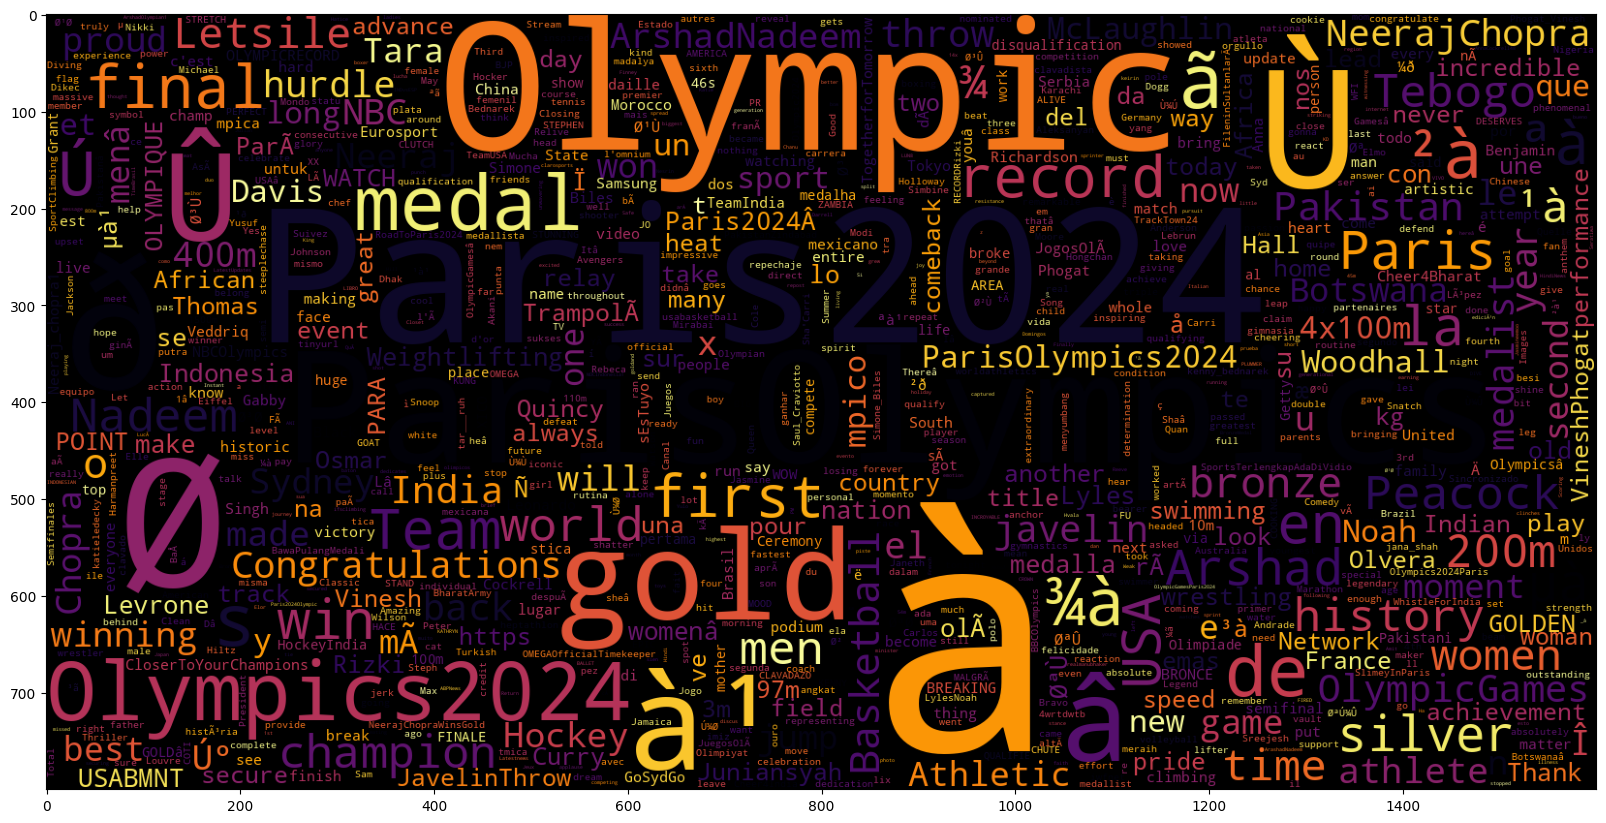

In [112]:
# ! pip install WordCloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Extract processed text from your DataFrame
processedtext = df['Tweet_Content'].tolist()

# Use all processed text (up to the length of your dataset)
data_neg = processedtext[:len(processedtext)]

plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
               collocations=False,colormap='inferno').generate(" ".join(data_neg))
plt.imshow(wc)
plt.show()

Some tweets seem corrupted, containing unusual or incorrect words, indicating potential data quality issues that need to be addressed for accurate analysis.

In [55]:
# A sample of a row with corrupted text
df['Tweet_Content'].iloc[1000]

'à¹\x80à¸«à¸£à¸µà¸¢à¸\x8dà¸\x97à¸\xadà¸\x87à¹\x80à¸«à¸£à¸µà¸¢à¸\x8dà¹\x81à¸£à¸\x81à¸\x88à¸²à¸\x81à¸\x99à¹\x89à¸\xadà¸\x87à¹\x80à¸\x97à¸\x99à¸\x99à¸´à¸ª à¹\x83à¸\x99 #à¹\x82à¸\xadà¸¥à¸´à¸¡à¸\x9bà¸´à¸\x812024 à¸\x82à¸\xadà¹\x81à¸ªà¸\x94à¸\x87à¸\x84à¸§à¸²à¸¡à¸¢à¸´à¸\x99à¸\x94à¸µà¸\x94à¹\x89à¸§à¸¢à¸\x99à¸°à¸\x84à¸£à¸±à¸\x9a à¹\x80à¸\x9bà¹\x87à¸\x99à¸\x82à¸\xadà¸\x87à¸\x82à¸§à¸±à¸\x8dà¸§à¸±à¸\x99à¹\x80à¸\x81à¸´à¸\x94à¹\x83à¸«à¹\x89à¸\x95à¸±à¸§à¹\x80à¸\xadà¸\x87à¸\x97à¸µà¹\x88à¸ªà¸¸à¸\x94à¸¢à¸\xadà¸\x94à¸¡à¸²à¸\x81à¹\x86! #à¸\x82à¸³à¸ªà¸²à¸£à¸\x82à¸±à¸\x93à¸\x91à¹\x8c #Olympics #PARIS2024 #à¹\x80à¸\x97à¸\x84à¸§à¸±à¸\x99à¹\x82à¸\x94 #à¹\x80à¸\x97à¸\x99à¸\x99à¸´à¸ªà¸\x9eà¸²à¸\x93à¸´à¸\xa0à¸±à¸\x84'

**A function to remove corrupted Texts**

In [13]:
def remove_corrupted_text(text):
    """
    Remove corrupted text from the input string. This includes non-alphanumeric characters,
    repeated characters, and other irregularities.

    Returns:
    str: The cleaned string with corrupted text removed.
    """
    if not isinstance(text, str):
        # Handle non-string values, e.g., convert to string or skip
        return ''  # Or any suitable handling

    # Define a regular expression pattern to match corrupted words
    corrupted_word_pattern = re.compile(r'\b\w*[^a-zA-Z0-9\s,.!?\'"-]\w*\b|\b\w*(.)\1{2,}\w*\b')

    # Remove corrupted text
    cleaned_text = re.sub(corrupted_word_pattern, '', text)

    # Remove extra white spaces
    cleaned_text = re.sub(r'\s+', ' ', cleaned_text).strip()

    return cleaned_text

**A function for Text Cleaning**

In [14]:
# Initialize stopwords and lemmatizer
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def lemmatize_tweet(text):
    # Remove corrupted text
    text = remove_corrupted_text(text)

    # Remove URLs
    text = re.sub(r'http\S+', '', text)
    # Remove mentions
    text = re.sub(r'@\w+', '', text)
    # Remove hashtags (keep the text after the #)
    text = re.sub(r'#', '', text)
    # Remove special characters like "&quot;"
    text = re.sub(r'&\w+;', '', text)
    # Remove punctuation
    text = "".join([char for char in text if char not in string.punctuation])
    # Tokenize text
    tokens = re.split('\W+', text.lower())
    # Remove stopwords and lemmatize the tokens
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    # Remove extra white spaces
    tokens = [word.strip() for word in tokens if word.strip() != '']
    # Remove numbers
    tokens = [word for word in tokens if not word.isdigit()]
    # Tag parts of speech
    pos_tags = nltk.pos_tag(tokens)
    # Filter tokens to retain only nouns, adjectives, verbs, and adverbs
    important_pos = {'NN', 'NNS', 'NNP', 'NNPS', 'JJ', 'JJR', 'JJS', 'VB', 'VBD', 'VBG', 'VBN', 'VBP', 'VBZ', 'RB', 'RBR', 'RBS'}
    tokens = [word for word, tag in pos_tags if tag in important_pos]
    return tokens

def join_text(tokens):
    """
    This function takes a list of tokens (words) and returns them as a single string.
    Each token is separated by a space.

    Parameters:
    tokens (list of str): A list of tokens to be joined.

    Returns:
    str: The tokens joined into a single string separated by spaces.
    """
    return " ".join(tokens)

# Load the data (replace with your actual file path)
data_path = '2024-olympics-sentiments.csv'
df = pd.read_csv(data_path)

# Apply the lemmatize_tweet function to the 'Tweet_Content' column
df['lemmatized_tweet'] = df['Tweet_Content'].apply(lambda x: lemmatize_tweet(x))

# Join the tokens back into a single string
df['clean_tweet'] = df['lemmatized_tweet'].apply(lambda x: join_text(x))

# Print the cleaned tweets
print(df.head())


  Category     Keyword                                       Web_Page_URL  \
0  TopPost  #paris2024  https://twitter.com/search?q=#paris2024&src=ty...   
1  TopPost  #paris2024  https://twitter.com/search?q=#paris2024&src=ty...   
2  TopPost  #paris2024  https://twitter.com/search?q=#paris2024&src=ty...   
3  TopPost  #paris2024  https://twitter.com/search?q=#paris2024&src=ty...   
4  TopPost  #paris2024  https://twitter.com/search?q=#paris2024&src=ty...   

                                       Tweet_Website              Author_Name  \
0  https://twitter.com/usabasketball/status/18216...           USA Basketball   
1  https://twitter.com/canlesofficial/status/1821...                   Canles   
2  https://twitter.com/Olympics/status/1821643768...  The Olympic GamesReload   
3  https://twitter.com/FIBA/status/18216605850475...                     FIBA   
4  https://twitter.com/WorldAthletics/status/1821...          World Athletics   

                  Author_Web_Page_URL Tweet_Timest

In [117]:
# Check if the corrupted words are still there in row 1000
df['clean_tweet'].iloc[1000]

'neeraj chopra gold medal olympics nominated world athlete year matter great pride country india many many congratulation gold medal gold neerajchopra'

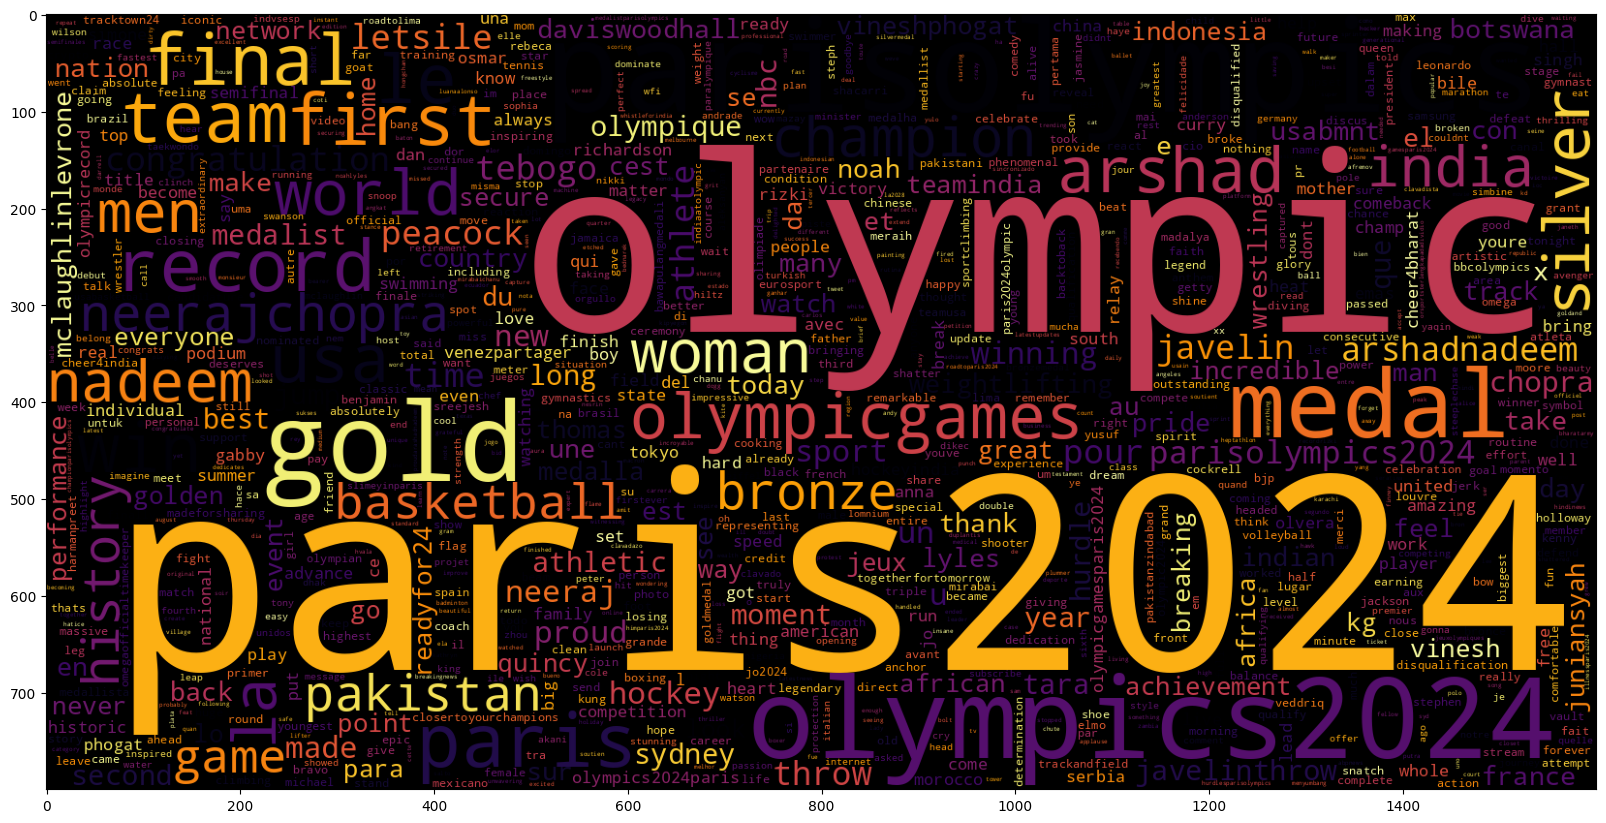

In [118]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Extract processed text from your DataFrame
processedtext = df['clean_tweet'].tolist()

# Use all processed text (up to the length of your dataset)
data_neg = processedtext[:len(processedtext)]

plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
               collocations=False, colormap='inferno').generate(" ".join(data_neg))
plt.imshow(wc)
plt.show()

In [15]:
# Save the DataFrame to a new CSV file
df.to_csv('cleaned-sentiments.csv', index=False)
